In [1]:
2+2

4

In [2]:
import numpy as np

In [6]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [7]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [8]:
import pandas as pd

In [9]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
                       })

In [10]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [11]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [12]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [13]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [14]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [15]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [17]:
#This is the easiest way to compute the returns.
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [18]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [20]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<Axes: >

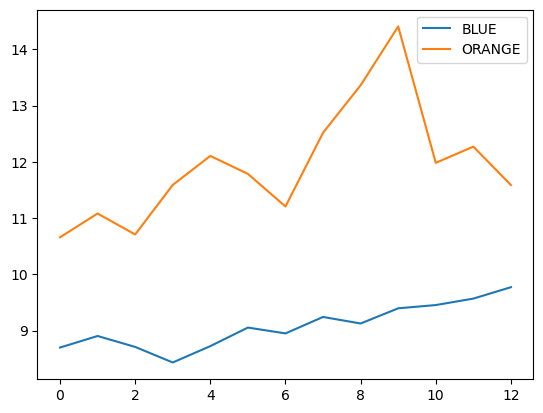

In [21]:
prices.plot()

<Axes: >

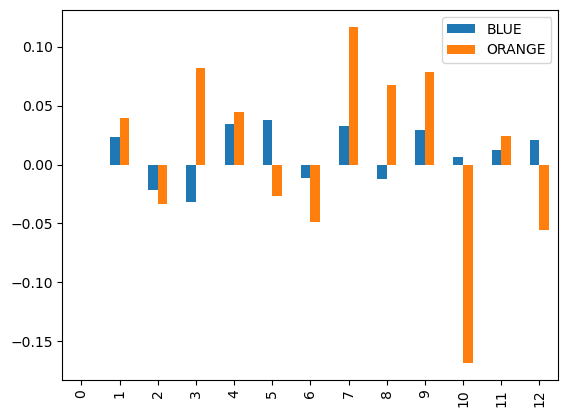

In [22]:
returns.plot.bar()

In [23]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [24]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [25]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [26]:
np.prod(returns  + 1) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [27]:
## Annualization

In [29]:
#Monthly return is 1 percent using annualization we can calculate for 12 months.
rm = 0.01
(1 + rm)**12 - 1

0.12682503013196977

In [30]:
#Quaterly return is 4 percent we can calculate the return for 4 months.
rq = 0.04
(1 + rq)**4 - 1

0.1698585600000002

In [31]:
#Daily return is 0.01 percent we can calculate the daily return by powering to 252 because of the total trading days in one year.
rd = 0.0001
(1 + rd)**252 - 1

In [35]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [36]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [37]:
returns.shape

(12, 2)

In [39]:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = np.sqrt(variance)

In [40]:
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [41]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [43]:
#monthly volatiltiy
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [45]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                    header = 0, index_col = 0, parse_dates = True, na_values = -99.99
                     )

In [46]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [47]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [48]:
returns = returns/100

In [50]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<Axes: >

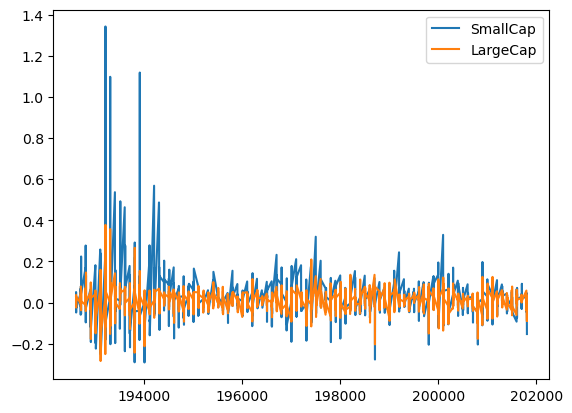

In [51]:
returns.plot.line()

In [52]:
returns.std()
#stnadard deviation of the blue is twice as much as orange.

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [53]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [57]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [59]:
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [61]:
annualized_return = (return_per_month + 1)**12 - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [62]:
#more common way for annualized return
annualized_return = (returns + 1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [63]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [64]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [65]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv")

In [66]:
returns

,Unnamed: 0,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1,192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
2,192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
3,192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
4,192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,201808,-99.99,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
1106,201809,-99.99,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
1107,201810,-99.99,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
1108,201811,-99.99,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [67]:
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns

,Lo 20,Hi 20
0,-0.57,3.33
1,3.84,2.33
2,-0.48,-0.09
3,-3.29,-2.95
4,-0.55,3.16
...,...,...
1105,3.09,2.49
1106,-2.04,0.19
1107,-10.52,-7.41
1108,-2.78,2.49


In [68]:
returns.columns= ['SmallCap', 'LargeCap']

In [69]:
returns

,SmallCap,LargeCap
0,-0.57,3.33
1,3.84,2.33
2,-0.48,-0.09
3,-3.29,-2.95
4,-0.55,3.16
...,...,...
1105,3.09,2.49
1106,-2.04,0.19
1107,-10.52,-7.41
1108,-2.78,2.49


<Axes: >

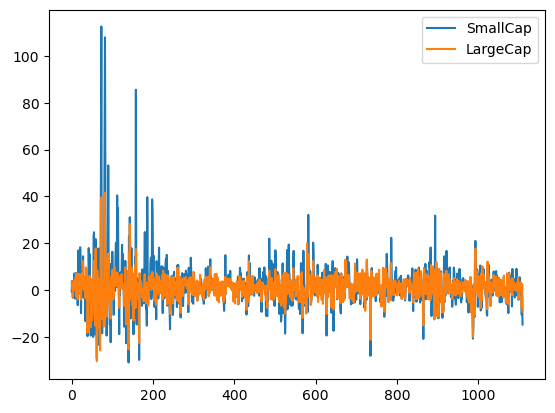

In [70]:
returns.plot.line()

In [72]:
returns = returns / 100

In [73]:
returns.std()

SmallCap    0.097197
LargeCap    0.056325
dtype: float64

In [75]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [78]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.011860
LargeCap    0.007859
dtype: float64

In [79]:
annualized_return = (return_per_month + 1)**12 - 1
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [80]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.362271
LargeCap    0.351023
dtype: float64

In [81]:
# Compute Drawdowns

<Axes: >

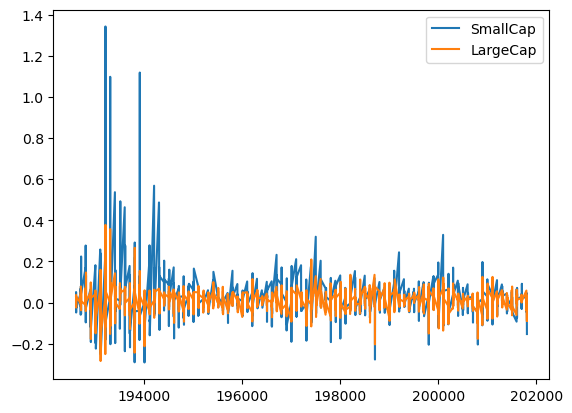

In [84]:
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                    header = 0, index_col = 0, parse_dates = True, na_values = -99.99
                     )

rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [85]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [87]:
#convert integer to datetime
rets.index = pd.to_datetime(rets.index, format = "%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [88]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [89]:
rets["1975"]

/var/folders/hh/1qw11svj2913226t4vlc07b00000gn/T/ipykernel_88459/1118287903.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["1975"]


,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Copmpute drawdown

In [91]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

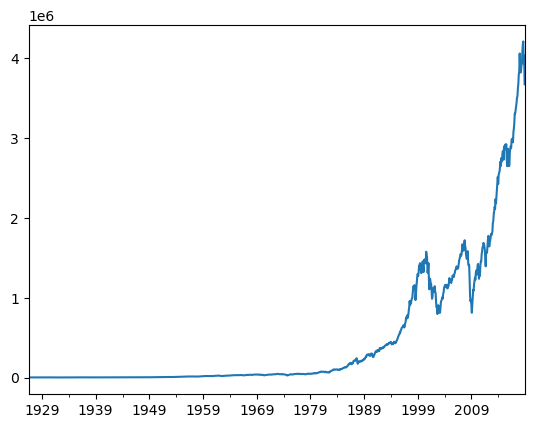

In [92]:
wealth_index.plot.line()

<Axes: >

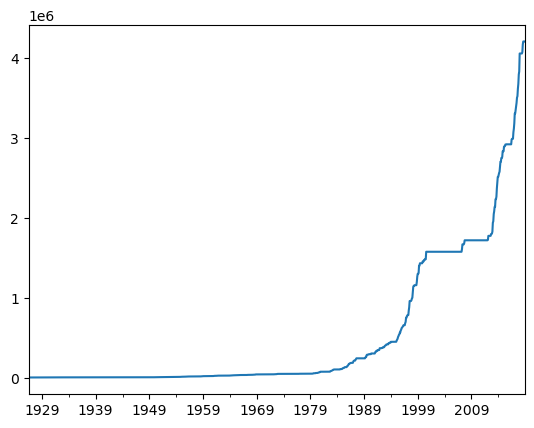

In [94]:
#Use cummax for cumilative maximum points in our data.
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<Axes: >

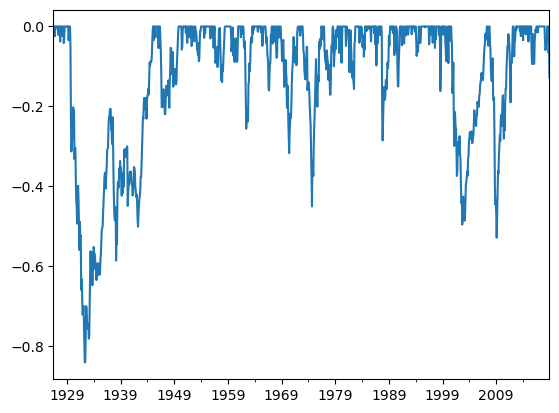

In [96]:
# Drawdown calculation using wealth index and previous peaks.
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [97]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [98]:
drawdown.min()

-0.8400375277943123

In [100]:
drawdown["1975":].min()

-0.5280945042309304

In [101]:
#idxmin method returns us the index of the minimum point we are looking for.
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [103]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """

    wealth_index = 1000*(1+return_series).cumpod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })